In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import decomposition, preprocessing

from uhi_cws_lausanne import regr_utils

np.random.seed(0)
sns.set_style("whitegrid")

In [ ]:
stations_gdf_filepath = "../data/processed/stations.gpkg"
station_features_filepath = "../data/processed/stations-features.csv"
grid_gdf_filepath = "../data/processed/regular-grid.gpkg"
grid_features_filepath = "../data/processed/grid-features.csv"

# output plots
dst_feature_scatter_filepath = "../reports/figures/features-pca-scatter.pdf"
dst_pca_loadings_filepath = "../reports/figures/pca-loadings.pdf"

# for plots
figwidth = plt.rcParams["figure.figsize"][0]
figheight = plt.rcParams["figure.figsize"][1]
feature_label_dict = {
    "building_volume_100": "Building volume (100 m)",
    "building_volume_250": "Building volume (250 m)",
    "building_volume_500": "Building volume (500 m)",
    "elevation": "Elevation",
    "lake_dist": "Distance to lake",
    "northness_250": "Northness (250 m)",
    "northness_500": "Northness (500 m)",
    "slope_250": "Slope (250 m)",
    "slope_500": "Slope (500 m)",
    "tpi_250": "TPI (250 m)",
    "tpi_500": "TPI (500 m)",
    "tree_canopy_100": "Tree canopy (100 m)",
    "tree_canopy_250": "Tree canopy (250 m)",
    "tree_canopy_500": "Tree canopy (500 m)",
}
heatmap_cmap = "RdYlBu"

## Load data

In [ ]:
station_features_gdf = regr_utils.get_site_features_gdf(
    station_features_filepath, stations_gdf_filepath
)
station_features_gdf.head()

,source,geometry,building_volume_100,building_volume_250,building_volume_500,tree_canopy_100,tree_canopy_250,tree_canopy_500,slope_250,slope_500,northness_250,northness_500,tpi_250,tpi_500,elevation,lake_dist
station_id,,,,,,,,,,,,,,,,
NABLAU,Official,POINT (2539020 1152974),4.125657e+06,2.547040e+08,4.804493e+09,0.071970,0.083270,0.101137,0.144186,0.177705,-0.361542,-0.312035,0.829834,9.341858,577.88040,2180.436846
PUY,Official,POINT (2540819 1151510),3.492351e+06,1.908322e+08,3.169833e+09,0.038706,0.098202,0.108252,0.176746,0.224837,-0.636290,-0.532102,-0.696106,4.946564,455.29044,755.631427
WSLLAF,Official,POINT (2539058 1156741),0.000000e+00,2.015655e+06,1.712379e+08,0.066272,0.030899,0.051662,0.110623,0.148837,-0.127812,-0.092798,-2.650940,-1.232178,755.43830,5845.328440
VD_Lausanne_PdL,Official,POINT (2537375 1154164),2.010137e+06,9.073344e+07,2.040286e+09,0.047142,0.077296,0.091048,0.091237,0.121033,-0.367936,-0.191801,-1.391418,3.981079,597.27875,2819.677957
VD_Bussigny,Official,POINT (2532800 1155659),3.961911e+06,1.490493e+08,2.292667e+09,0.053667,0.063621,0.068894,0.095105,0.104195,-0.264232,-0.313744,-0.400757,2.394074,429.82294,3702.175319


In [ ]:
grid_features_gdf = regr_utils.get_site_features_gdf(
    grid_features_filepath, grid_gdf_filepath
)
grid_features_gdf.head()

,geometry,building_volume_100,building_volume_250,building_volume_500,tree_canopy_100,tree_canopy_250,tree_canopy_500,slope_250,slope_500,northness_250,northness_500,tpi_250,tpi_500,elevation,lake_dist
grid_cell_id,,,,,,,,,,,,,,,
0,POINT (2530943 1159028),4.455135e+06,1.552025e+08,1.558808e+09,0.128979,0.113644,0.077412,0.179259,0.131803,-0.063243,-0.028459,3.125336,5.303558,458.81256,7167.311476
1,POINT (2531043 1159028),6.205182e+06,1.790114e+08,1.486427e+09,0.084066,0.099822,0.071714,0.152311,0.123443,-0.012153,-0.044484,7.380096,14.914276,474.88605,7190.671595
2,POINT (2531143 1159028),6.470383e+06,1.778776e+08,1.365014e+09,0.073275,0.085098,0.061699,0.124803,0.112126,0.006078,-0.059496,3.917511,14.029175,479.18660,7214.515666
3,POINT (2531243 1159028),4.886985e+06,1.467498e+08,1.156481e+09,0.090050,0.067263,0.049860,0.090302,0.094933,-0.083323,-0.107737,6.966553,15.612549,484.40070,7239.581044
4,POINT (2531343 1159028),1.960604e+06,1.022862e+08,9.655384e+08,0.061179,0.053919,0.039066,0.075153,0.080776,-0.137983,-0.122495,3.204498,7.938690,479.06308,7265.936354


EVR:  0.5039434811830847


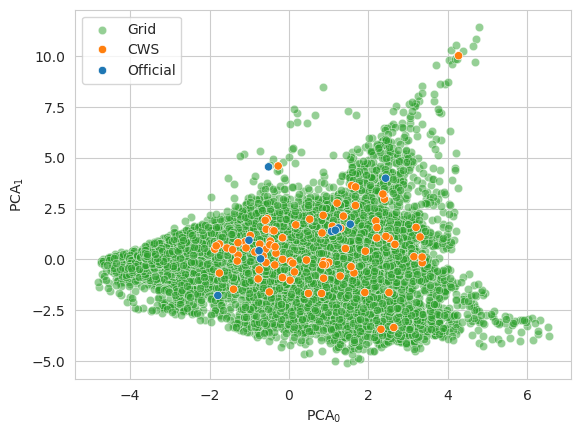

In [ ]:
X_gdf = pd.concat(
    [grid_features_gdf.assign(**{"source": "Grid"}), station_features_gdf]
)
X_df = X_gdf.drop(columns=["source", "geometry"])
X_df = pd.DataFrame(
    preprocessing.StandardScaler().fit_transform(X_df),
    index=X_df.index,
    columns=X_df.columns,
)
# k = 4
# X_df.std().sort_values(ascending=False).iloc[:k].index

# PCA scatter plot
n_components = 2
pca = decomposition.PCA(n_components).fit(X_df)
evr = pca.explained_variance_ratio_.sum()
print("EVR: ", evr)
plot_df = pd.DataFrame(pca.transform(X_df), index=X_df.index).assign(
    **{"source": X_gdf["source"]}
)
# order manually for the plot
plot_df = pd.concat(
    [plot_df[plot_df["source"] == source] for source in ["Grid", "CWS", "Official"]]
)
# ACHTUNG: hardcoded color palette order swapping for notebook-wide consistency
fig, ax = plt.subplots()
palette = list(reversed(sns.color_palette(n_colors=3)))
sns.scatterplot(
    plot_df[plot_df["source"] == "Grid"],
    x=0,
    y=1,
    label="Grid",
    color=palette[0],
    alpha=0.5,
    ax=ax,
)
sns.scatterplot(
    plot_df[plot_df["source"] != "Grid"],
    x=0,
    y=1,
    hue="source",
    palette=palette[1:],
    ax=ax,
)
for coord in ["x", "y"]:
    label = getattr(ax, f"get_{coord}label")()
    getattr(ax, f"set_{coord}label")(f"PCA$_{label}$")
ax.get_legend().set_title("")
fig.savefig(dst_feature_scatter_filepath, bbox_inches="tight")

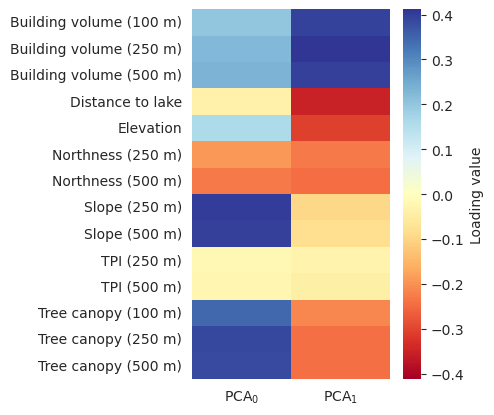

In [ ]:
loading_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"PCA$_{i}$" for i in range(pca.n_components_)],
    index=X_df.columns.map(feature_label_dict),
).sort_index()
max_abs = max(abs(loading_df.min().min()), loading_df.max().max())
fig, ax = plt.subplots(figsize=(0.5 * figwidth, figheight))
sns.heatmap(
    loading_df,
    cmap=heatmap_cmap,
    vmin=-max_abs,
    vmax=max_abs,
    cbar_kws={"label": "Loading value"},
)
fig.savefig(dst_pca_loadings_filepath, bbox_inches="tight")